# Model traning, evaluation and clustering

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
import pickle



# Load data and filter columns


In [7]:
numeric_df = pd.read_csv('../data/6_spotify_tracks_numeric.csv')
numeric_df

# filter out columns
columns_to_keep = ['popularity','duration_ms', 'explicit', 'pop','old school hip hop','rap','rock' ,'hard rock', 'release_year']
df_filtered = numeric_df[columns_to_keep]


# Scaling - MinMaxScaler

In [8]:
scaler = MinMaxScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)
numeric_df_scaled= pd.DataFrame(numeric_df_scaled, columns=numeric_df.columns)


In [9]:

numeric_df_scaled.head()   


,popularity,duration_ms,explicit,21st century classical,abstract,abstract hip hop,accordeon,accordion,acid house,acid jazz,...,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco,release_year
0,0.164706,0.079038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866142
1,0.011765,0.135982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.834646
2,0.035294,0.129014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889764
3,0.011765,0.072799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.858268
4,0.000000,0.106662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976378


In [16]:
#save the scaled data
numeric_df_scaled.to_csv('../data/tracks_minmax_scaled.csv', index=False)

with open('../scaler/tracks_minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [11]:
numeric_df_scaled.head()

,popularity,duration_ms,explicit,21st century classical,abstract,abstract hip hop,accordeon,accordion,acid house,acid jazz,...,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco,release_year
0,0.164706,0.079038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866142
1,0.011765,0.135982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.834646
2,0.035294,0.129014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889764
3,0.011765,0.072799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.858268
4,0.000000,0.106662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976378


# Standard scaling

In [12]:
scaler2 = StandardScaler()
df_scaled = scaler2.fit_transform(df_filtered)
df_scaled= pd.DataFrame(df_scaled, columns=df_filtered.columns)


In [13]:
#save the scaler
df_scaled.to_csv('../data/tracks_standard_scaled.csv', index=False)

with open('../scaler/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler2, f)



In [14]:
df_scaled.head()

,popularity,duration_ms,explicit,pop,old school hip hop,rap,rock,hard rock,release_year
0,0.119762,-0.792934,-0.257316,-0.125131,-0.077505,-0.104234,-0.211111,-0.152744,0.567523
1,-0.705649,0.156315,-0.257316,-0.125131,-0.077505,-0.104234,-0.211111,-0.152744,0.273994
2,-0.578663,0.040148,-0.257316,-0.125131,-0.077505,-0.104234,-0.211111,-0.152744,0.787670
3,-0.705649,-0.896931,3.886277,-0.125131,-0.077505,-0.104234,-0.211111,-0.152744,0.494141
4,-0.769142,-0.332452,-0.257316,-0.125131,-0.077505,-0.104234,-0.211111,-0.152744,1.594874


## KMeans modeling

Elbow method, a sharp elbow suggests the optimal number of clusters.

Silutehe score, a higher score indicates better clustering(range -1 to 1). Higher score indicates clusters are more compact and well-separated, lower score indicates clusters are more overlapping.


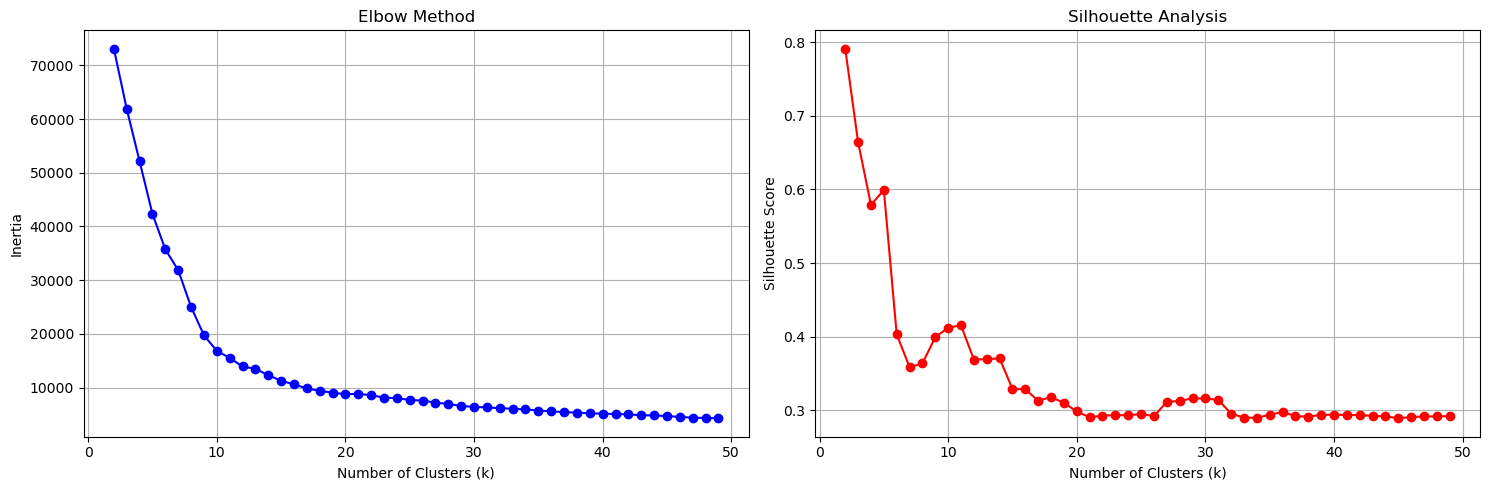

k=2: Silhouette Score=0.791
k=3: Silhouette Score=0.664
k=4: Silhouette Score=0.579
k=5: Silhouette Score=0.599
k=6: Silhouette Score=0.403
k=7: Silhouette Score=0.359
k=8: Silhouette Score=0.364
k=9: Silhouette Score=0.400
k=10: Silhouette Score=0.412
k=11: Silhouette Score=0.416
k=12: Silhouette Score=0.369
k=13: Silhouette Score=0.370
k=14: Silhouette Score=0.371
k=15: Silhouette Score=0.329
k=16: Silhouette Score=0.329
k=17: Silhouette Score=0.313
k=18: Silhouette Score=0.318
k=19: Silhouette Score=0.310
k=20: Silhouette Score=0.299
k=21: Silhouette Score=0.291
k=22: Silhouette Score=0.293
k=23: Silhouette Score=0.294
k=24: Silhouette Score=0.293
k=25: Silhouette Score=0.295
k=26: Silhouette Score=0.292
k=27: Silhouette Score=0.312
k=28: Silhouette Score=0.313
k=29: Silhouette Score=0.316
k=30: Silhouette Score=0.316
k=31: Silhouette Score=0.314
k=32: Silhouette Score=0.296
k=33: Silhouette Score=0.290
k=34: Silhouette Score=0.290
k=35: Silhouette Score=0.294
k=36: Silhouette Score

In [17]:

k_range = range(2, 50)
inertia = []
silhouette_scores = [] 

# Calculate for both metrics 
for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    # Calculate and store inertia
    inertia.append(kmeans.inertia_)
    
    # Calculate and store silhouette score
    if k>=2:
        cluster_labels = kmeans.predict(df_scaled)
        silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))


# PLOTING
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the elbow curve
ax1.plot(list(k_range), inertia, marker='o', linestyle='-', color='b')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Plot the silhouette scores
ax2.plot(list(k_range), silhouette_scores, marker='o', linestyle='-', color='r')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print the silhouette scores for each k
for k, score in zip(k_range, silhouette_scores):
    print(f'k={k}: Silhouette Score={score:.3f}')

# Find the optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'\nOptimal number of clusters based on highest silhouette score: {optimal_k}')



## Clustering index

In [19]:

#load sporify million tracks
spotify_df = pd.read_csv('../data/4_spotify_million_tracks.csv')

#  best performing model k=11
kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original dataframe
spotify_df['cluster'] = kmeans.labels_

# Print the size of each cluster
print(pd.Series(kmeans.labels_).value_counts().sort_index())

#save best performing model k=11
with open('../models/kmeans_model_11.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


0     4841
1      124
2       81
3      136
4      257
5      790
6      460
7       55
8     1295
9     1086
10      86
Name: count, dtype: int64


In [20]:
spotify_df.head()   

,original_title,original_artist,spotify_title,spotify_artist,album,release_date,popularity,duration_ms,explicit,album_cover,genres,cluster
0,Je Sais Que La Terre Est Plate,Raphaël,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008-03-14,14,150040,False,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['chanson', 'french pop', 'french rock', 'nouv...",0
1,On Efface,Julie Zenatti,On efface,Julie Zenatti,Comme vous...,2004-03-21,1,253000,False,https://i.scdn.co/image/ab67616d0000b27398d445...,"['chanson', 'french pop']",0
2,Howells Delight,The Baltimore Consort,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011-02-01,3,240400,False,https://i.scdn.co/image/ab67616d0000b27353a906...,['medieval'],0
3,Martha Served,I Hate Sally,Martha Served,I Hate Sally,Don't Worry Lady,2007-06-12,1,138760,True,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['canadian metal', 'canadian post-hardcore', '...",6
4,Zip-A-Dee-Doo-Dah,Orlando Pops Orchestra,"Zip-a-Dee-Doo-Dah (From ""Song of the South"")",Orlando Pops Orchestra,"Most Amazing Movie, Musical & TV Themes, Vol.6",2022-10-07,0,199986,False,https://i.scdn.co/image/ab67616d0000b27349ea4d...,['pops orchestra'],0


In [21]:
# Save the labeled dataset
spotify_df.to_csv('../data/7_clustered_dataset.csv', index=False)
